In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)
from sklearn.model_selection import train_test_split
import torch
import math


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
#Create a matrix phi
"""
[1 x x^2 x^3
 1 x1 x1^2 x1^3 ]
"""
def Phi(X,polynomial):
  N = X.shape[0]
  Phi = [np.ones((N,)).reshape(-1,1)]
  for degree in range(1,polynomial):
    Phi.append(X**degree)
  Phi = np.hstack(Phi)
  return Phi

In [3]:
#preparing a model for the regression

class RegressionML:
  def __init__(self):
    self.weights = None
  def train(self, Phi,t):
    self.weights = np.dot(np.linalg.inv(np.dot(Phi.T,Phi)),np.dot(Phi.T, t))
    return self.weights
  def predict(self,Phi):
    return Phi @ self.weights

In [4]:
#function! for an input x, our y == f(x) + noise (as defined)
def f(x):
  return np.sin(x)

In [5]:
def definesample(N,M):
  x = np.linspace(-5,5,N).reshape(-1,1)
  data_noise = np.random.normal(0, 0.5, N).reshape(-1,1)
  y = f(x) + data_noise
  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.2,shuffle=True)
  Phi_train = Phi(x_train,M)
  Phi_test = Phi(x_test,M)
  return x_train, x_test, y_train, y_test,Phi_train,Phi_test

In [6]:
x_train, x_test, y_train, y_test,Phi_train,Phi_test = definesample(1000,5)

In [7]:
def modelpredict(y_train,Phi_train,Phi_test):
  model_ml = RegressionML()
  w= model_ml.train(Phi_train,y_train)
  ml_pred_test = model_ml.predict(Phi_test)
  ml_pred_train=(model_ml.predict(Phi_train))
  print (f"The weights as obtained from one step solution:\n {w}")
  return w, ml_pred_test, ml_pred_train

w, ml_pred_test, ml_pred_train = modelpredict(y_train,Phi_train,Phi_test)

The weights as obtained from one step solution:
 [[ 1.69890033e-02]
 [ 3.97267712e-01]
 [-1.72700240e-04]
 [-3.02314285e-02]
 [-9.82909863e-05]]


Text(0, 0.5, "outputs 'y'")

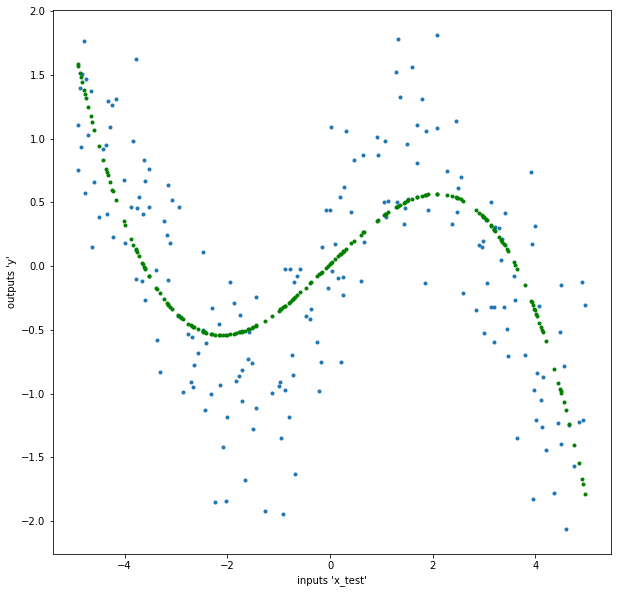

In [8]:
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test,'.',label="Training data")
# plt.plot(X_train,Y_train,'.',label="Training data")
plt.plot(x_test,ml_pred_test,'.',color='green')

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")

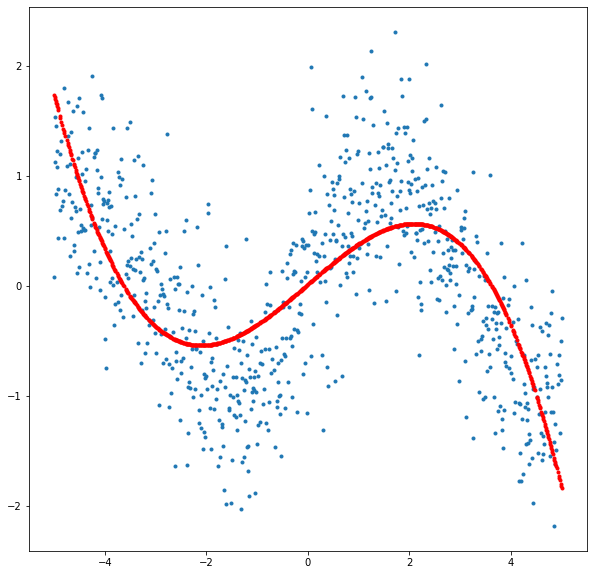

In [9]:

plt.figure(figsize=(10,10))
plt.plot(x_train,y_train,'.',label="Training data")
# plt.plot(X_train,Y_train,'.',label="Training data")
plt.plot(x_train,ml_pred_train,'.',color='red')


In [10]:
#y_test == observed value, ml_pred == predicted output i.e. from the model, therefore RMS: 
import math
def RMSE(observed, predicted):
  RMSE =math.sqrt(np.square(np.subtract(observed,predicted)).mean()) 
  return RMSE

error_test= RMSE(y_test,ml_pred_test)
error_train = RMSE(y_train,ml_pred_train)
print ("The root mean square on the test set is {}".format(error_test))
print ("The root mean square on the train set is {}".format(error_train))

The root mean square on the test set is 0.6130722933403482
The root mean square on the train set is 0.6295192071311908


# Question 2 (Batch Gradient Descent)

For gradient descent, we need to first initialize weight, and then go on about fixing the weight. W(new) = w(old) - eta.d(error))/dw


In [11]:
#Normalizing train data!
def normalizetrain(Phi_train):
  Phi_train = Phi_train[:,1:]
  X_norm = Phi_train
  mu = np.mean(Phi_train,axis=0)
  sigma = np.std(Phi_train,axis=0)         
  print (sigma)   
  X_norm = (Phi_train-mu)/sigma
  X_norm=np.c_[np.ones(X_norm.shape[0]),X_norm]
  return X_norm

X_norm = normalizetrain(Phi_train)

[  2.87076134   7.44508753  46.97115559 166.69211936]


In [12]:
#Normalizing testdata!
def normalizetest(Phi_test):
  Phi_test = Phi_test[:,1:]
  test_norm = Phi_test
  mu = np.mean(Phi_test,axis=0)
  sigma = np.std(Phi_test,axis=0)         
  print (sigma)   
  test_norm = (Phi_test-mu)/sigma
  test_norm=np.c_[np.ones(test_norm.shape[0]),test_norm]
  return test_norm

test_norm = normalizetest(Phi_test)

[  2.95735697   7.54618215  48.95599922 169.61105927]


In [13]:
def Gradient_Descent(X_norm, y_train, alpha, numofiter):
  running_error = {}
  # weights= np.array([[ 5.79131772],[-0.0755089 ],[-0.29547548],[ 0.00786309],[ 0.01174108]])
  n= X_norm.shape[1]
  weights = np.random.rand(n).reshape(-1,1)
  m = X_norm.shape[0]
  x_transpose = X_norm.transpose()
  for i in range(0, numofiter):
    hypo = np.dot(X_norm, weights)
    loss = hypo - y_train
    J = np.sum(loss ** 2) / (2*m)
    running_error[i] = J
    gradient = np.dot(x_transpose, loss)/m
    weights = weights - (alpha)*gradient
    if i%100 ==0:
      print ("iter %s | J: %.3f" % (i, J))
    # return weights
  return weights,running_error

In [36]:
theta,running_error=Gradient_Descent(X_norm, y_train, 0.001, 10000)

iter 0 | J: 1.580
iter 100 | J: 1.199
iter 200 | J: 0.938
iter 300 | J: 0.757
iter 400 | J: 0.632
iter 500 | J: 0.545
iter 600 | J: 0.483
iter 700 | J: 0.439
iter 800 | J: 0.408
iter 900 | J: 0.385
iter 1000 | J: 0.368
iter 1100 | J: 0.355
iter 1200 | J: 0.346
iter 1300 | J: 0.338
iter 1400 | J: 0.332
iter 1500 | J: 0.326
iter 1600 | J: 0.322
iter 1700 | J: 0.318
iter 1800 | J: 0.315
iter 1900 | J: 0.312
iter 2000 | J: 0.309
iter 2100 | J: 0.307
iter 2200 | J: 0.305
iter 2300 | J: 0.303
iter 2400 | J: 0.300
iter 2500 | J: 0.299
iter 2600 | J: 0.297
iter 2700 | J: 0.295
iter 2800 | J: 0.293
iter 2900 | J: 0.291
iter 3000 | J: 0.290
iter 3100 | J: 0.288
iter 3200 | J: 0.287
iter 3300 | J: 0.285
iter 3400 | J: 0.283
iter 3500 | J: 0.282
iter 3600 | J: 0.281
iter 3700 | J: 0.279
iter 3800 | J: 0.278
iter 3900 | J: 0.276
iter 4000 | J: 0.275
iter 4100 | J: 0.274
iter 4200 | J: 0.272
iter 4300 | J: 0.271
iter 4400 | J: 0.270
iter 4500 | J: 0.269
iter 4600 | J: 0.268
iter 4700 | J: 0.266
iter

In [37]:
theta

array([[ 0.00447455],
       [ 0.57042038],
       [-0.00477323],
       [-0.84987292],
       [-0.01882188]])

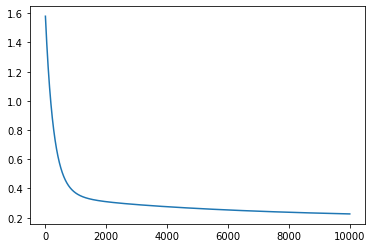

In [38]:
lists = sorted(running_error.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.show()

In [39]:
ml_pred2 = np.matmul(test_norm,theta)

Text(0, 0.5, "outputs 'y'")

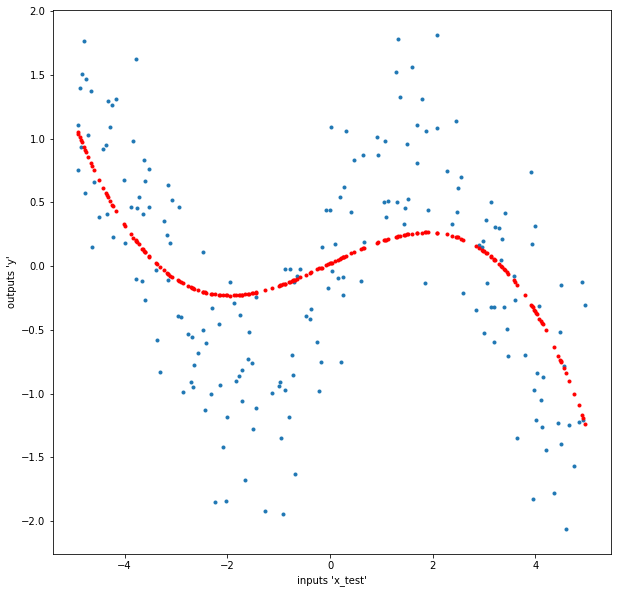

In [40]:
plt.figure(figsize=(10,10))

plt.plot(x_test,y_test,'.',label="Training data")
plt.plot(x_test,ml_pred2,'.',color='red')

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")

In [19]:
error= RMSE(y_test,ml_pred2)
print ("The root mean square on the test set is {}".format(error))

The root mean square on the test set is 0.6683942601682994


Qustion 3.e Ans: 

***QUESTION 3 ***

---

Overfitting issue:

Overfitting seems to happen, when we take less number of samples i.e. N = 12 ,and increase the basis function. In this case we take polynomial=9


In [20]:
#split the new data sample with size of N=12 and M =9  
x_traino, x_testo, y_traino, y_testo,Phi_traino,Phi_testo = definesample(12,10)
train_norm=normalizetrain(Phi_traino)
tes_norm= normalizetest(Phi_testo)
wo, ml_pred_testo, ml_pred_traino = modelpredict(y_traino,train_norm,tes_norm)

[3.25747788e+00 8.78476455e+00 6.47499840e+01 2.41605997e+02
 1.52450569e+03 6.23164933e+03 3.73509244e+04 1.58144641e+05
 9.26353170e+05]
[1.54515743e+00 7.43291326e+00 3.16699216e+01 1.31212477e+02
 5.39010738e+02 2.20807916e+03 9.03718620e+03 3.69759442e+04
 1.51272912e+05]
The weights as obtained from one step solution:
 [[-2.24318183e-02]
 [-1.89160156e+01]
 [ 1.33339844e+01]
 [ 1.20714844e+02]
 [-1.82187500e+02]
 [-1.91175781e+02]
 [ 4.76531250e+02]
 [-7.89062500e+01]
 [-3.09750000e+02]
 [ 1.67031250e+02]]


In [21]:
error_testo= RMSE(y_testo,ml_pred_testo)
error_traino = RMSE(y_traino,ml_pred_traino)
print ("The root mean square on the test set is {}".format(error_testo))
print ("The root mean square on the train set is {}".format(error_traino))

The root mean square on the test set is 2.447757022089012
The root mean square on the train set is 0.07456255793667388


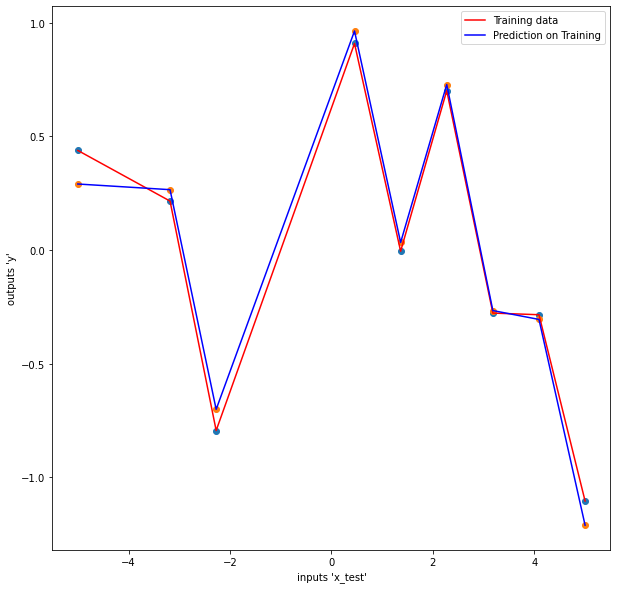

In [22]:

plt.figure(figsize=(10,10))
new_x, new_y = zip(*sorted(zip(x_traino, y_traino)))
plt.scatter(new_x,new_y)
plt.plot(new_x,new_y,'red',label = "Training data")
new_xt, new_yt = zip(*sorted(zip(x_traino, ml_pred_traino)))
plt.scatter(new_xt,new_yt)
plt.plot(new_xt,new_yt,'blue',label = "Prediction on Training")

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")
plt.legend()

Text(0, 0.5, "outputs 'y'")

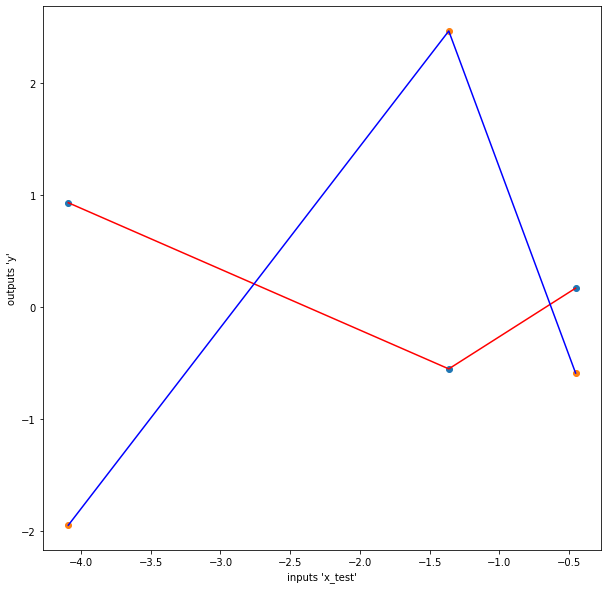

In [23]:
#make a graph for the test data as well!!

plt.figure(figsize=(10,10))
new_x, new_y = zip(*sorted(zip(x_testo, y_testo)))
plt.scatter(new_x,new_y)
plt.plot(new_x,new_y,'red',label = "Test data")
new_xt, new_yt = zip(*sorted(zip(x_testo, ml_pred_testo)))
plt.scatter(new_xt,new_yt)
plt.plot(new_xt,new_yt,'blue',label='Prediction on Test')

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")

In [24]:
def wregularized(Phi,Y,lambda_value):
  first = np.dot(Phi.T,Phi)
  second = np.dot(lambda_value,np.identity(Phi.shape[1]))
  x=first +second
  remaining = np.dot(Phi.T,Y)
  weights = np.dot(np.linalg.inv(x),remaining)
  return weights

In [55]:
running_error_test =[]
running_error_train =[]
lambda_val = []
for lambda_valu in arange(0,0.3,0.01):
  weights=wregularized(Phi_traino,y_traino,lambda_valu)
  ml_prediction_test = np.matmul(Phi_testo,weights)
  ml_prediction_train = np.matmul(Phi_traino,weights)
  error_testo= RMSE(y_testo,ml_prediction_test)
  running_error_test.append(error_testo)
  error_traino = RMSE(y_traino,ml_prediction_train)
  running_error_train.append(error_traino)
  lambda_val.append(lambda_valu)

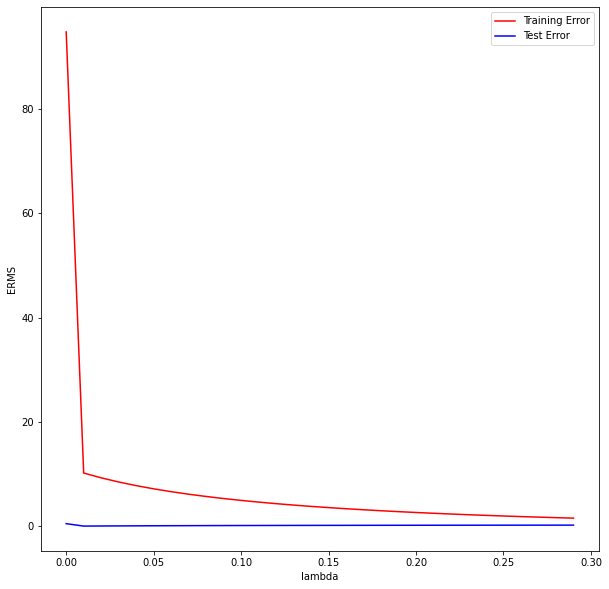

In [56]:
plt.figure(figsize=(10,10))
plt.plot(lambda_val,running_error_test,'red',label = "Training Error")
plt.plot(lambda_val,running_error_train,'blue',label= "Test Error")
plt.xlabel("lambda")
plt.ylabel("ERMS")
plt.legend()

In [57]:
ml_prediction_test = np.matmul(Phi_testo,weights)
ml_prediction_train = np.matmul(Phi_traino,weights)

Text(0, 0.5, "outputs 'y'")

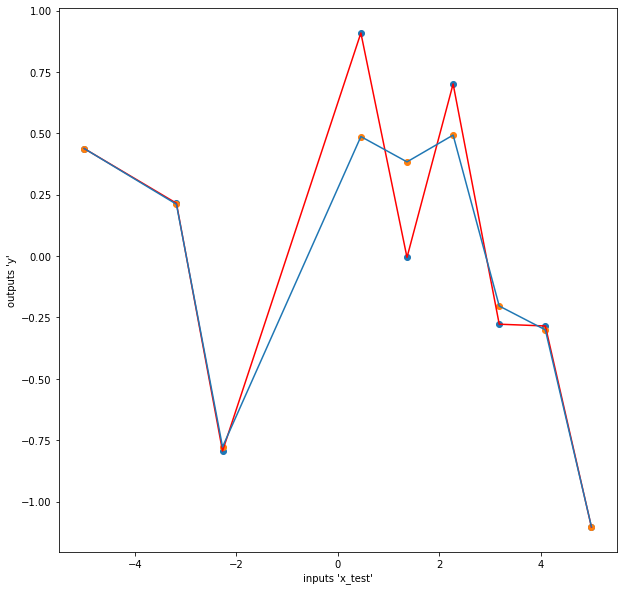

In [58]:
plt.figure(figsize=(10,10))
new_x, new_y = zip(*sorted(zip(x_traino, y_traino)))
plt.scatter(new_x,new_y)
plt.plot(new_x,new_y,'red')
new_xt, new_yt = zip(*sorted(zip(x_traino, ml_prediction_train)))
plt.scatter(new_xt,new_yt)
plt.plot(new_xt,new_yt)

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")

Text(0, 0.5, "outputs 'y'")

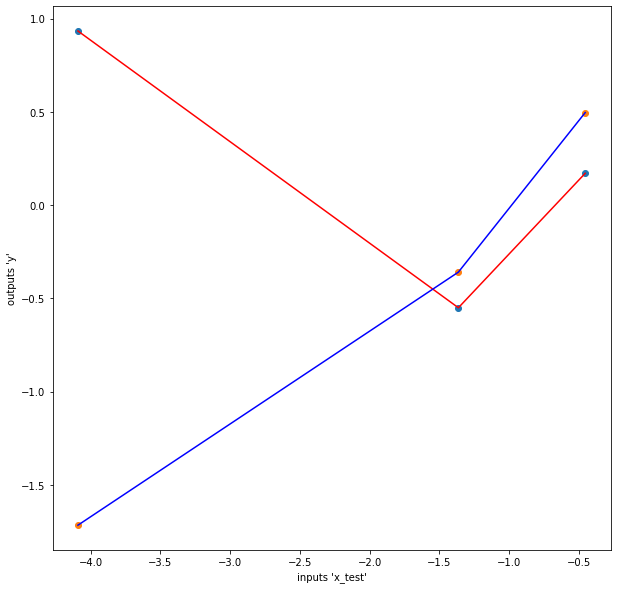

In [59]:
plt.figure(figsize=(10,10))
new_x, new_y = zip(*sorted(zip(x_testo, y_testo)))
plt.scatter(new_x,new_y)
plt.plot(new_x,new_y,'red',label = "Test data")
new_xt, new_yt = zip(*sorted(zip(x_testo, ml_prediction_test)))
plt.scatter(new_xt,new_yt)
plt.plot(new_xt,new_yt,'blue',label='Prediction on Test')

plt.xlabel("inputs 'x_test'")
plt.ylabel("outputs 'y'")

In [60]:
error_testo= RMSE(y_testo,ml_prediction_test)
error_traino = RMSE(y_traino,ml_prediction_train)
print ("The root mean square error on the test set is {}".format(error_testo))
print ("The root mean square erroron the train set is {}".format(error_traino))

The root mean square error on the test set is 1.5452452073382066
The root mean square erroron the train set is 0.20505288088758705


References:
 https://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php
 https://towardsdatascience.com/linear-regression-from-math-to-code-9659132383ec
